<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/NLP_WordVectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U gensim==4.*

In [2]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf

from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
!gdown "https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku"

Downloading...
From: https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:27<00:00, 60.8MB/s]


In [4]:
embedding_file = './GoogleNews-vectors-negative300.bin.gz'

In [5]:
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=200000)

CPU times: user 4.28 s, sys: 263 ms, total: 4.54 s
Wall time: 4.65 s


In [6]:
pizza = word_vectors['pizza']
print(f'Vector dimension: {pizza.shape}')

# The embedding for the word 'pizza'.
print(pizza)

Vector dimension: (300,)
[-1.25976562e-01  2.53906250e-02  1.66992188e-01  5.50781250e-01
 -7.66601562e-02  1.28906250e-01  1.02539062e-01 -3.94821167e-04
  1.21582031e-01  4.32128906e-02  1.72851562e-01 -6.83593750e-02
  3.41796875e-01  8.39843750e-02  6.68945312e-02  2.67578125e-01
 -3.71093750e-02 -5.56640625e-02  1.80664062e-01  1.90429688e-02
 -5.07812500e-02  9.03320312e-03  1.76757812e-01  6.49414062e-02
 -6.25000000e-02 -9.42382812e-02 -9.71679688e-02  4.00390625e-01
  1.15234375e-01  1.02539062e-01 -1.86767578e-02 -2.69531250e-01
  1.80664062e-01  1.25000000e-01 -3.17382812e-02 -5.49316406e-02
  3.45703125e-01 -1.57470703e-02  1.82390213e-05  2.07031250e-01
 -1.25976562e-01 -2.83203125e-01  2.00195312e-01  8.34960938e-02
 -4.73632812e-02 -3.11279297e-02 -2.61718750e-01  1.69921875e-01
 -2.02636719e-02  1.53320312e-01 -1.20605469e-01  3.75000000e-01
 -5.68847656e-02 -4.76074219e-03 -1.95312500e-01 -2.03125000e-01
  3.00781250e-01 -1.01074219e-01 -3.18359375e-01 -9.03320312e-02


In [9]:
print(word_vectors.similarity('pizza', 'tomato'))
print(word_vectors.similarity('pizza', 'sauce'))
print(word_vectors.similarity('pizza', 'cheese'))
print(word_vectors.similarity('pizza', 'pie'))
print(word_vectors.similarity('pizza', 'dish'))
print(word_vectors.similarity('pizza', 'bubbly'))
print(word_vectors.similarity('pizza', 'beer'))
print(word_vectors.similarity('pizza', 'veggie'))
print(word_vectors.similarity('pizza', 'pepperoni'))

0.35505623
0.36959887
0.47083578
0.47884324
0.3909703
0.20242114
0.4668596
0.415411
0.57963943


In [13]:
print(word_vectors.similarity('pizza', 'gorilla'))
print(word_vectors.similarity('pizza', 'tree'))
print(word_vectors.similarity('pizza', 'yoga'))
print(word_vectors.similarity('pizza', 'munchies'))
print(word_vectors.similarity('pizza', 'diet'))
print(word_vectors.similarity('pizza', 'broccoli'))
print(word_vectors.similarity('pizza', 'italian'))
print(word_vectors.similarity('pizza', 'caveman'))
print(word_vectors.similarity('pizza', 'dough'))

0.108518735
0.11185601
0.14119941
0.47221074
0.18705975
0.40431416
0.25442347
0.21917732
0.3947332


In [14]:
try:
  word_vectors['womblyboo']
except KeyError as e:
  print(e)

"Key 'womblyboo' not present"


In [15]:
word_vectors.n_similarity("dog bites man".split(), "canine nips human".split())

0.5314661

In [16]:
word_vectors.n_similarity("martian dolphins are hostile".split(), "i flunked calligraphy school".split())

0.14505777

In [17]:
word_vectors.n_similarity("dog bites man".split(), "man bites dog".split())

1.0

In [18]:
s1 = "Volkswagen intends to double electric car sales in China".lower().split()
s2 = "First Toyota with solid state battery will be hybrid".lower().split()
word_vectors.n_similarity(s1, s2)

0.52682734

In [19]:
word_vectors.most_similar(positive=['cell'], topn=10)

[('cells', 0.8180485367774963),
 ('Cells', 0.6146953105926514),
 ('Cell', 0.5321314930915833),
 ('cellular', 0.5272858142852783),
 ('tumor_cells', 0.5097643136978149),
 ('ES_cells', 0.4866572618484497),
 ('immune_cells', 0.4831920266151428),
 ('epithelial_cells', 0.47818055748939514),
 ('molecule', 0.47757473587989807),
 ('proteins', 0.4749472737312317)]

In [20]:
word_vectors.most_similar(positive=['cell', 'phone'], topn=10)

[('cell_phone', 0.6861391067504883),
 ('cellular', 0.6757438778877258),
 ('cellphone', 0.6633196473121643),
 ('telephone', 0.6474039554595947),
 ('Phone', 0.605189323425293),
 ('phones', 0.5896332859992981),
 ('cells', 0.585094690322876),
 ('cordless_phone', 0.5711769461631775),
 ('Cell', 0.5617641806602478),
 ('landline', 0.5467296242713928)]

In [21]:
word_vectors.doesnt_match(["apple", "orange", "hamburger", "banana", "kiwi"])

'hamburger'

In [22]:
word_vectors.doesnt_match(["Microsoft", "Apple", "Toyota", "Amazon", "Netflix", "Google"])

'Toyota'

In [23]:
def display_pca_scatterplot(model, words):
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r', s=128)
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

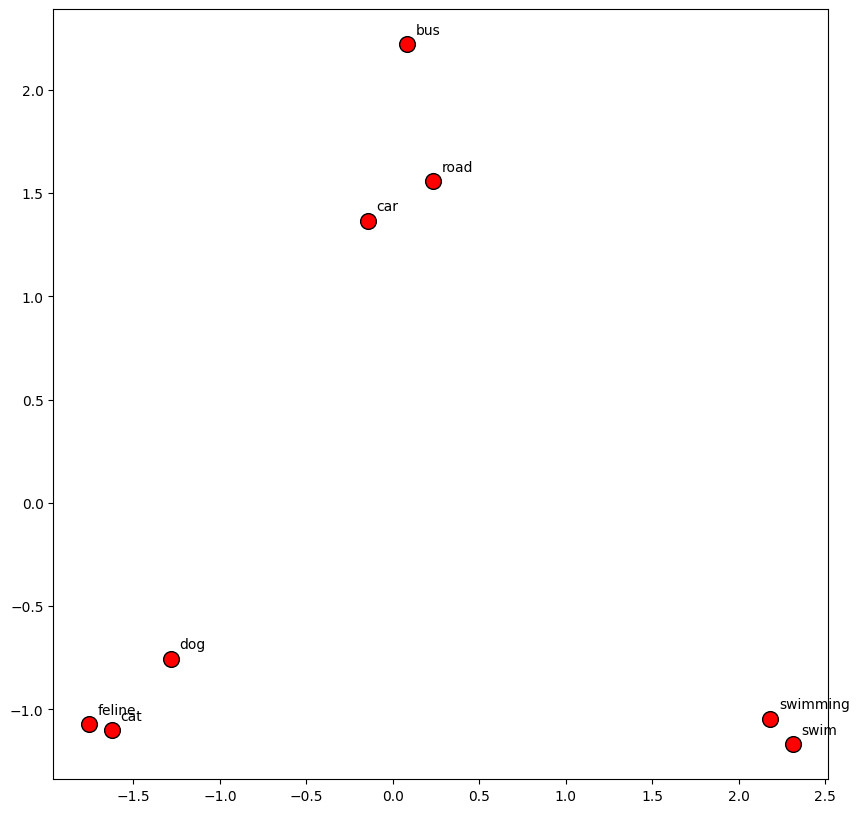

In [24]:
display_pca_scatterplot(word_vectors, ['swim', 'swimming', 'cat', 'dog', 'feline', 'road', 'car', 'bus'])

In [25]:
word_vectors.most_similar(positive=['Italy', 'London'], negative=['Rome'], topn=3)

[('UK', 0.6230568885803223),
 ('Britain', 0.6016390323638916),
 ('United_Kingdom', 0.534345805644989)]

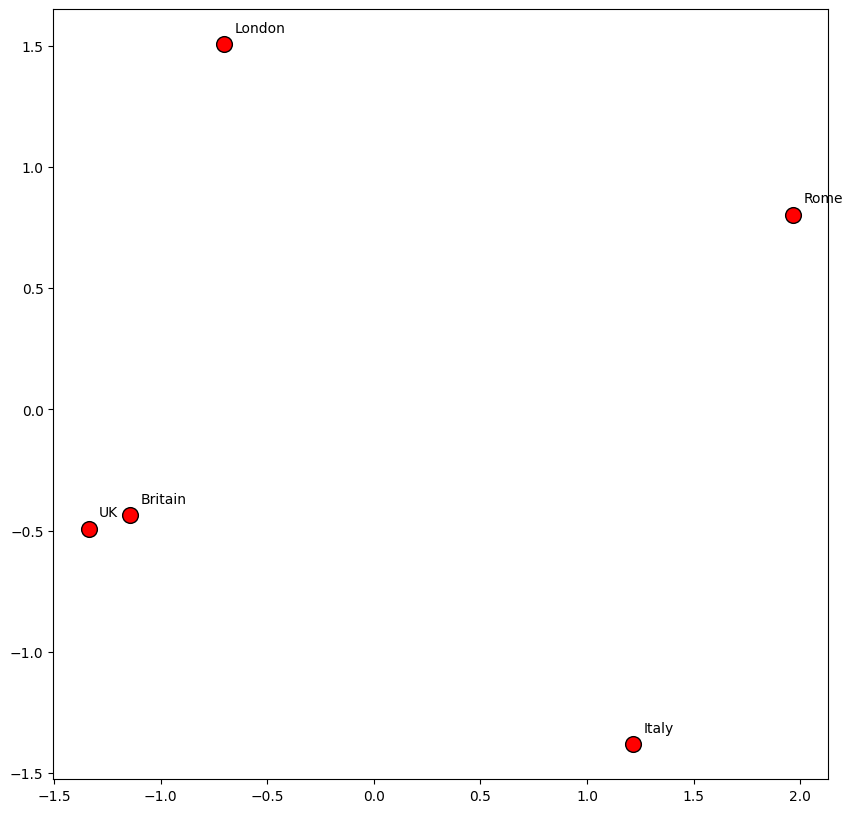

In [26]:
display_pca_scatterplot(word_vectors, ['Rome', 'Italy', 'London', 'Britain', 'UK'])

In [27]:
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=1000000)

CPU times: user 19.6 s, sys: 2.2 s, total: 21.8 s
Wall time: 22.2 s


In [28]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz"

--2023-08-18 08:00:06--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.78.214, 52.217.10.126, 52.216.131.189, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.78.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166373201 (159M) [application/x-tar]
Saving to: ‘/root/input/yelp_review_polarity_csv.tgz’

yelp_review_polarit 100%[===================>] 158.67M  14.6MB/s    in 12s     

2023-08-18 08:00:19 (13.5 MB/s) - ‘/root/input/yelp_review_polarity_csv.tgz’ saved [166373201/166373201]



In [29]:
!tar xvzf /root/input/yelp_review_polarity_csv.tgz

# Show current working directory.
!pwd

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv
/content


In [30]:
yelp_train = pd.read_csv('yelp_review_polarity_csv/train.csv', names=['sentiment', 'review'])
print(yelp_train.shape)

(560000, 2)


In [31]:
yelp_train.head()

,sentiment,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [32]:
TRAIN_SIZE = 100000
yelp_train = yelp_train.sample(frac=1, random_state=1)[:TRAIN_SIZE].copy()
print(yelp_train.shape)

(100000, 2)


In [33]:
yelp_train['sentiment'].replace(to_replace=1, value=0, inplace=True)
yelp_train['sentiment'].replace(to_replace=2, value=1, inplace=True)

In [34]:
yelp_train.head()

,sentiment,review
39658,1,"omg, the grandma g's pizza with rosemary chick..."
330033,0,Microwaved food over over over seasoned gyro m...
238898,0,"While the food is good, the service leaves a l..."
453536,0,Called the Chandler PD about the sign spinner ...
555973,1,"Just took Ewok, my approx. 6 month old shih tz..."


In [35]:
yelp_train_split, yelp_val_split = train_test_split(yelp_train, train_size=0.85, random_state=1)

In [36]:
# Set up training data.
train_reviews = yelp_train_split['review']
y_train = np.array(yelp_train_split['sentiment'])

# Set up validation data.
val_reviews = yelp_val_split['review']
y_val = np.array(yelp_val_split['sentiment'])

In [37]:
collections.Counter(y_train)

Counter({0: 42395, 1: 42605})

In [38]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=20000,
                                               filters='0123456789!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                                               lower=True)

In [39]:
%%time
tokenizer.fit_on_texts(train_reviews)

CPU times: user 9.84 s, sys: 45 ms, total: 9.88 s
Wall time: 9.95 s


In [40]:
%%time
X_train = tokenizer.texts_to_sequences(train_reviews)

CPU times: user 6.18 s, sys: 72.2 ms, total: 6.25 s
Wall time: 7.1 s


In [41]:
# The first review in the training set, vectorized.
print(X_train[0])

[49, 14, 2224, 4199, 1981, 11, 2312, 16, 6, 59, 3042, 138, 5, 145, 1, 294, 1, 378, 370, 7, 8, 37, 6, 1, 120, 944, 16362, 1026, 33, 3014, 21, 1170, 12144, 3036, 1427, 5513, 56, 3214, 2, 106, 5514, 136, 886, 1, 2224, 268, 3, 90, 22, 1278, 944, 16362, 51, 183, 36, 60, 107, 3214, 9, 14, 795, 26, 351, 3, 148, 5, 150, 107, 65, 12, 47, 74, 1966, 1935, 42, 7, 1, 132, 5352, 24, 1918, 36, 5481, 21, 1, 11637, 1378, 1116, 6722, 13, 64, 262, 19603, 2, 312, 4, 1253, 3278, 5, 14, 362, 116, 6, 10, 1, 128, 271, 137, 2100, 7, 16, 14, 362, 2, 3, 148, 4, 156, 1694, 1047, 17, 147, 86, 323, 598, 1, 1103, 207, 1055, 51, 544, 783, 21, 1, 3872, 15, 26, 147, 17728, 2, 27, 148, 39, 15, 102, 993, 18, 1, 1364, 55, 1, 6722, 5481, 2, 60, 39, 249, 102, 30, 282, 8, 161, 4, 43, 189, 46, 9, 944, 16362, 5, 1338, 65, 10, 674, 3, 102, 598, 2, 47, 64, 90, 279, 48, 64, 86, 124, 174, 1, 128, 18, 4, 545, 303, 1072, 13078, 12751, 17, 18, 1, 766, 13, 14, 362, 2, 3, 24, 282, 172, 360, 10, 815, 9, 107, 3, 78, 113, 39, 1, 5352, 24,

In [42]:
[tokenizer.index_word[x] for x in X_train[0][:3]]

['from', 'my', 'hospital']

In [43]:
# Review excerpt reconstructed from integer sequence.
tokenizer.sequences_to_texts([X_train[0]])[0][:300]

'from my hospital feedback form n nwhile this was an unpleasant experience to say the least the worst part of it all was the way dr haslett treated me doctors on previous shifts introduced themselves discussed their plans and said goodbye before leaving the hospital however i did not meet dr haslett '

In [44]:
# Original review text.
train_reviews.iloc[0][:300]

'From my hospital feedback form:\\n\\nWhile this was an unpleasant experience to say the least, the worst part of it all was the way Dr. Haslett treated me.  Doctors on previous shifts introduced themselves, discussed their plans and said goodbye before leaving the hospital.  However, I did not meet Dr'

In [45]:
MAX_REVIEW_LEN = 200
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAX_REVIEW_LEN)

In [46]:
print(X_train[0])
print(X_train[1])

[ 1037   957     2   356    36   184   267    13    24   576    21    13
   132    73    47   944 16362   102    22   141     7     1   238    64
     6  5990     5     2    24     5    30  1743     7    75     1  5352
   184   267    64    24   106    28   238     3   278   102    23  2902
    17    22    13    22    10     4    31     3    24    68  2489     3
   102   494  8000    49     3    24    91   538  6781   136     2     3
     6    22   828     9     1 13837     7  3942     3     6   142    49
     1    46     3    24   419    25     1  2224     5   121     2  2019
     5   429   238   694    17   118   102   477  2019    80   169  1026
    38    13     1     7  3442    28  1248   227    10  1427    17    80
   376    59  5112    18   944 16362     3     6   531  5381    36    55
   169  4867     5    10   376     4   120     2    37     3   102    99
   141    55     6     1 15231     7  3942    64   161   226    14   803
     9     4   893     2  3308    33    27   103 15

In [47]:
X_val = tokenizer.texts_to_sequences(val_reviews)
X_val = keras.preprocessing.sequence.pad_sequences(X_val, maxlen=MAX_REVIEW_LEN)

In [48]:
print(tokenizer.word_index['good'])

34


In [49]:
# Part of the vector for the word 'good'.
print(word_vectors['good'][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [50]:
# + 1 to account for padding token.
num_tokens = len(tokenizer.word_index) + 1

# Initialize a matrix of zeroes of size: vocabulary x embedding dimension.
embedding_dim = 300
embedding_matrix = np.zeros((num_tokens, embedding_dim))

for word, i in tokenizer.word_index.items():
  if word_vectors.has_index_for(word):
    embedding_matrix[i] = word_vectors[word].copy()

In [51]:
# Quick visual check.
print(embedding_matrix[tokenizer.word_index['good']][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [52]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=True
)

In [53]:
tf.random.set_seed(0)

model = keras.Sequential()

# This layer will output a sequence of 300-dimension *vectors*, one for each element in the input sequence.
model.add(embedding_layer)

# This layer will calculate an average of those vectors.
model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
review = "fantastic papaya steak"
print(f"Review: {review}")

review_sequence = tokenizer.texts_to_sequences([review])
print(f"Review as sequence of integers: {review_sequence}")

review_embeddings = embedding_layer(np.array(review_sequence))
print(f"Review embeddings shape: (Batch size: {review_embeddings.shape[0]}, \
Sequence length: {review_embeddings.shape[1]}, \
Embedding size: {review_embeddings.shape[2]})")

# How our document will be presented to the rest of the neural network.
print(f"Average of embeddings (shape): {np.mean(review_embeddings, axis=1).shape}")

Review: fantastic papaya steak
Review as sequence of integers: [[543, 5844, 305]]
Review embeddings shape: (Batch size: 1, Sequence length: 3, Embedding size: 300)
Average of embeddings (shape): (1, 300)


In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          28023900  
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 28,070,749
Trainable params: 28,070,749
Non-trainable params: 0
____________________________________________

In [56]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
167/167 [==============================] - 147s 875ms/step - loss: 0.3999 - accuracy: 0.8132 - val_loss: 0.2296 - val_accuracy: 0.9147
Epoch 2/20
167/167 [==============================] - 138s 829ms/step - loss: 0.1889 - accuracy: 0.9301 - val_loss: 0.2057 - val_accuracy: 0.9221
Epoch 3/20
167/167 [==============================] - 137s 819ms/step - loss: 0.1547 - accuracy: 0.9436 - val_loss: 0.1999 - val_accuracy: 0.9230
Epoch 4/20
167/167 [==============================] - 141s 843ms/step - loss: 0.1328 - accuracy: 0.9527 - val_loss: 0.2147 - val_accuracy: 0.9190
Epoch 5/20
167/167 [==============================] - 136s 817ms/step - loss: 0.1216 - accuracy: 0.9574 - val_loss: 0.2244 - val_accuracy: 0.9179
Epoch 6/20
167/167 [==============================] - 150s 897ms/step - loss: 0.1123 - accuracy: 0.9612 - val_loss: 0.2272 - val_accuracy: 0.9192
Epoch 7/20
167/167 [==============================] - 141s 842ms/step - loss: 0.1038 - accuracy: 0.9645 - val_loss: 0.2365 -

In [57]:
def plot_train_vs_val_performance(history):
  training_losses = history.history['loss']
  validation_losses = history.history['val_loss']

  training_accuracy = history.history['accuracy']
  validation_accuracy = history.history['val_accuracy']

  epochs = range(1, len(training_losses) + 1)

  import matplotlib.pyplot as plt
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  fig.tight_layout(pad=5.0)

  # Plot training vs. validation loss.
  ax1.plot(epochs, training_losses, 'bo', label='Training Loss')
  ax1.plot(epochs, validation_losses, 'b', label='Validation Loss')
  ax1.title.set_text('Training vs. Validation Loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()

  # PLot training vs. validation accuracy.
  ax2.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
  ax2.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
  ax2.title.set_text('Training vs. Validation Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()

  plt.show()

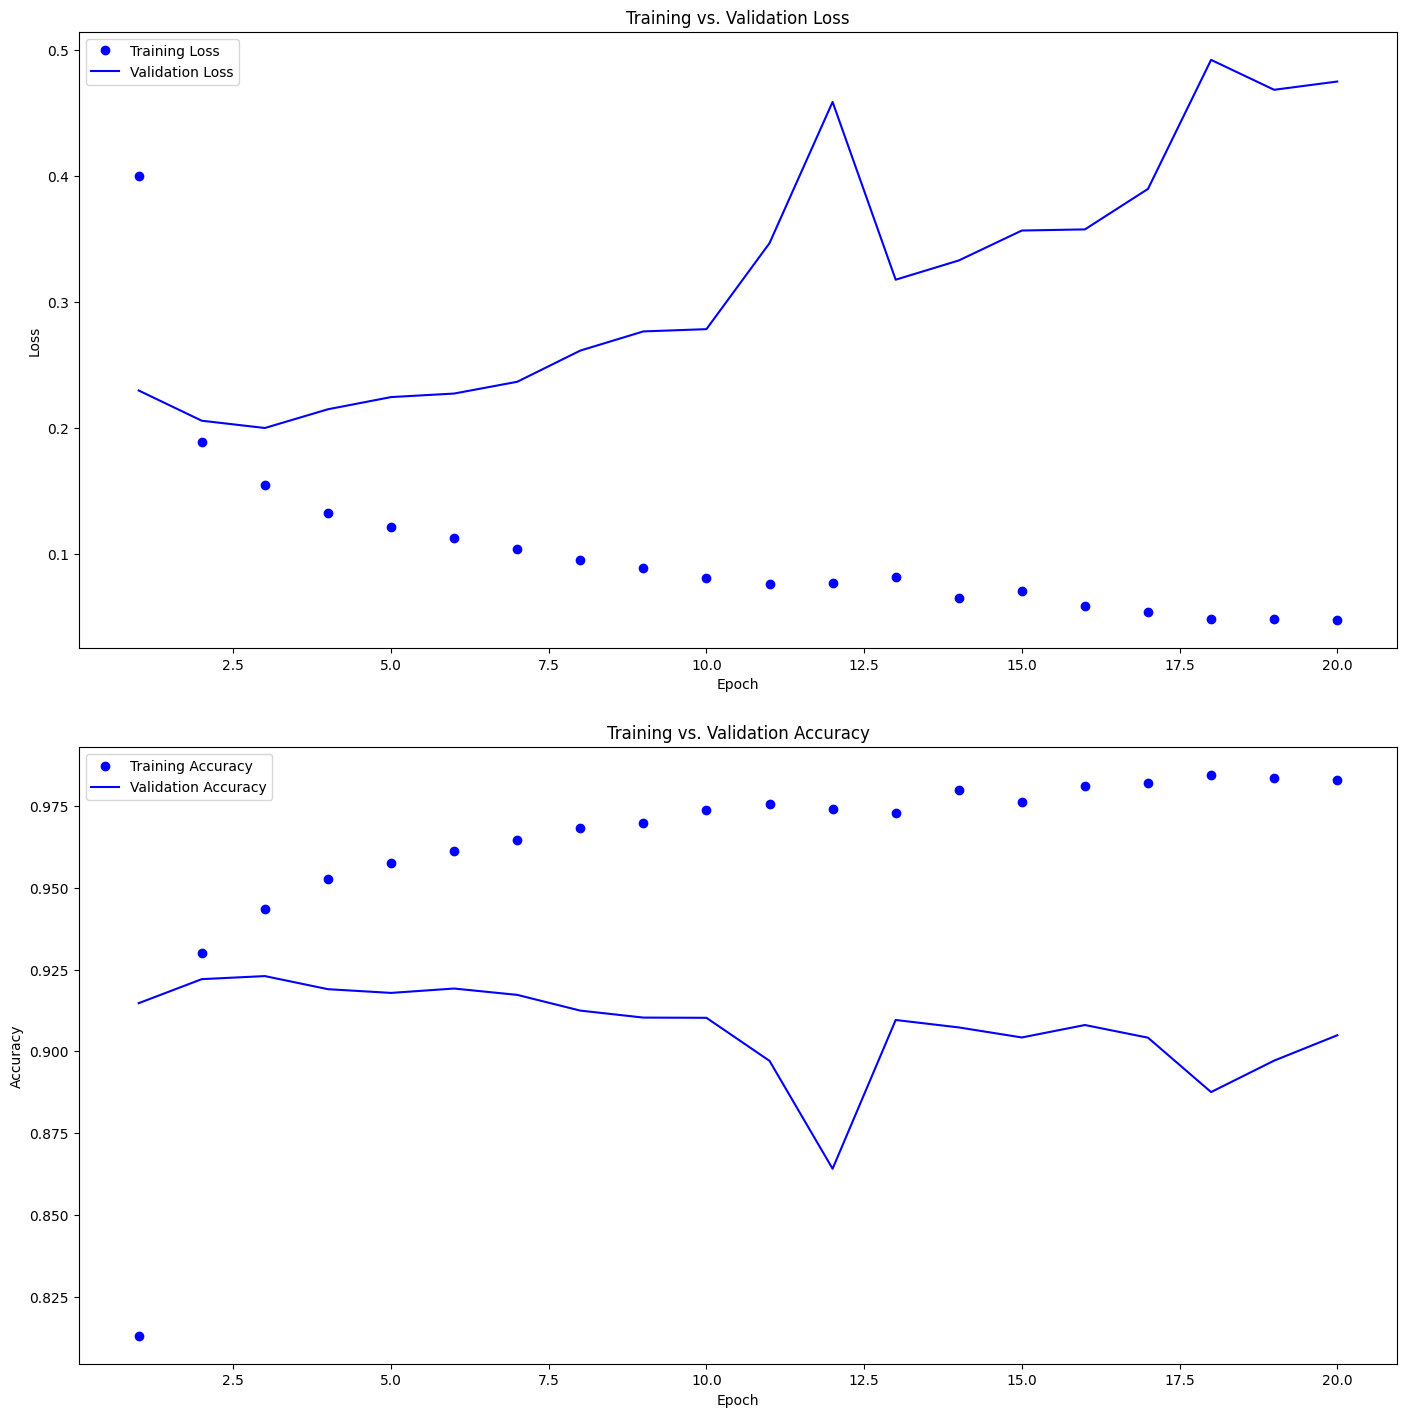

In [58]:
plot_train_vs_val_performance(history)

In [59]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=True
)

model = keras.Sequential()
model.add(embedding_layer)
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/3
167/167 [==============================] - 146s 870ms/step - loss: 0.3622 - accuracy: 0.8389 - val_loss: 0.2221 - val_accuracy: 0.9171
Epoch 2/3
167/167 [==============================] - 152s 911ms/step - loss: 0.1816 - accuracy: 0.9327 - val_loss: 0.1990 - val_accuracy: 0.9224
Epoch 3/3
167/167 [==============================] - 143s 853ms/step - loss: 0.1471 - accuracy: 0.9456 - val_loss: 0.1967 - val_accuracy: 0.9242


In [60]:
yelp_test = pd.read_csv('yelp_review_polarity_csv/test.csv', names=['sentiment', 'review'])

In [61]:
yelp_test['sentiment'].replace(to_replace=1, value=0, inplace=True)
yelp_test['sentiment'].replace(to_replace=2, value=1, inplace=True)
yelp_test.head()

,sentiment,review
0,1,"Contrary to other reviews, I have zero complai..."
1,0,Last summer I had an appointment to get new ti...
2,1,"Friendly staff, same starbucks fair you get an..."
3,0,The food is good. Unfortunately the service is...
4,1,Even when we didn't have a car Filene's Baseme...


In [62]:
y_test = np.array(yelp_test['sentiment'])
print(y_test)

[1 0 1 ... 0 0 0]


In [63]:
X_test = tokenizer.texts_to_sequences(yelp_test['review'])

In [64]:
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_REVIEW_LEN)

In [65]:
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 6s 5ms/step - loss: 0.1864 - accuracy: 0.9282


[0.18637822568416595, 0.9281842112541199]

In [66]:
def sentiment(reviews):
  seqs = tokenizer.texts_to_sequences(reviews)
  seqs = keras.preprocessing.sequence.pad_sequences(seqs, maxlen=MAX_REVIEW_LEN)
  return model.predict(seqs)

In [67]:
# Real reviews from Google Reviews.
pos_review = "The best seafood joint in East Village San Diego!  Great lobster roll, great fish, great oysters, great bread, great cocktails, and such amazing service.  The atmosphere is top notch and the location is so much fun being located just a block away from Petco Park (San Diego Padres Stadium)."
neg_review = "A thoroughly disappointing experience. When you book a Marriott you expect a certain standard. Albany falls way short. Room cleaning has to be booked 24 hours in advance but nobody thought to mention this at check in. The hotel is tired and needs a face-lift. The only bright light in a sea of mediocrity were the pancakes at breakfast. Sadly they weren't enough to save the experience. If you travel to Albany, then do yourself a big favour and book the Westin."

In [68]:
print(sentiment([pos_review, neg_review]))

1/1 [==============================] - 0s 100ms/step
[[0.99952114]
 [0.00305024]]


In [69]:
tf.random.set_seed(0)

model = keras.Sequential()

# The 'trainable' property is True by default.
model.add(layers.Embedding(input_dim=num_tokens,
                           output_dim=embedding_dim,
                           input_length=MAX_REVIEW_LEN))


model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val), callbacks=[es_callback])

Epoch 1/20
167/167 [==============================] - 139s 828ms/step - loss: 0.4297 - accuracy: 0.7792 - val_loss: 0.2251 - val_accuracy: 0.9133
Epoch 2/20
167/167 [==============================] - 134s 803ms/step - loss: 0.1848 - accuracy: 0.9302 - val_loss: 0.2124 - val_accuracy: 0.9163
Epoch 3/20
167/167 [==============================] - 149s 888ms/step - loss: 0.1503 - accuracy: 0.9458 - val_loss: 0.2037 - val_accuracy: 0.9218
Epoch 4/20
167/167 [==============================] - 137s 822ms/step - loss: 0.1315 - accuracy: 0.9539 - val_loss: 0.2128 - val_accuracy: 0.9202
Epoch 5/20
167/167 [==============================] - 135s 810ms/step - loss: 0.1201 - accuracy: 0.9582 - val_loss: 0.2251 - val_accuracy: 0.9176
Epoch 6/20
167/167 [==============================] - 136s 814ms/step - loss: 0.1101 - accuracy: 0.9626 - val_loss: 0.2319 - val_accuracy: 0.9184


In [70]:
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 6s 5ms/step - loss: 0.2175 - accuracy: 0.9221


[0.21746765077114105, 0.9220526218414307]